#### Import libraries and dataset

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_trainclass), (x_test, y_testclass) = cifar10.load_data()

In [5]:
# Def plot 1000 -> 1005
def plot(first_title, x, second_title, y):
    plt.figure(figsize=(10, 10))
    for i in range(5):
        ax = plt.subplot(5, 5, i + 1)
        plt.title(first_title)
        plt.imshow(tf.squeeze(x[1000+i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(5, 5, i + 1 + 5)
        plt.imshow(y[i])
        plt.title(second_title)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

#### Create autoencoder

In [6]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Lambda, Flatten, Dropout, Reshape, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy, mse

In [7]:
input_img = Input(shape=(32, 32, 3))

x = Conv2D(32, 3,activation='relu', padding="same")(input_img)
x = BatchNormalization()(x)
x = MaxPool2D(2)(x)
x = Conv2D(64, 3,activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = MaxPool2D(2)(x)
x = Conv2D(128, 3,activation='relu', padding="same")(x)
x = BatchNormalization()(x)
encoded = UpSampling2D((2,2))(x)
encoder = Model(inputs=input_img, outputs=encoded)

encoded_inputs = Input(shape=(16,16,128))

x = Conv2D(64, 3,activation='relu', padding="same")(encoded_inputs)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, 3,activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(3, 1)(x)
decoded = Activation("sigmoid")(x)
decoder = Model(inputs=encoded_inputs, outputs=decoded)

x = encoder(input_img)
x = decoder(x)
autoencoder = Model(inputs=input_img, outputs=x)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mse'])

In [8]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/25
391/391 [==============================] - 16s 25ms/step - loss: 0.5658 - accuracy: 0.7202 - mse: 0.0072 - val_loss: 0.5814 - val_accuracy: 0.7186 - val_mse: 0.0120
Epoch 2/25
391/391 [==============================] - 8s 21ms/step - loss: 0.5567 - accuracy: 0.7782 - mse: 0.0037 - val_loss: 0.5564 - val_accuracy: 0.7767 - val_mse: 0.0033
Epoch 3/25
391/391 [==============================] - 8s 20ms/step - loss: 0.5544 - accuracy: 0.7963 - mse: 0.0028 - val_loss: 0.5542 - val_accuracy: 0.7967 - val_mse: 0.0024
Epoch 4/25
391/391 [==============================] - 8s 20ms/step - loss: 0.5531 - accuracy: 0.8081 - mse: 0.0024 - val_loss: 0.5539 - val_accuracy: 0.8062 - val_mse: 0.0023
Epoch 5/25
391/391 [==============================] - 9s 22ms/step - loss: 0.5525 - accuracy: 0.8140 - mse: 0.0021 - val_loss: 0.5528 - val_accuracy: 0.8153 - val_mse: 0.0019
Epoch 6/25
391/391 [==============================] - 8s 20ms/step - loss: 0.5521 - accuracy: 0.8204 - mse: 0.0020 - val_los

1/1 [==============================] - 0s 336ms/step


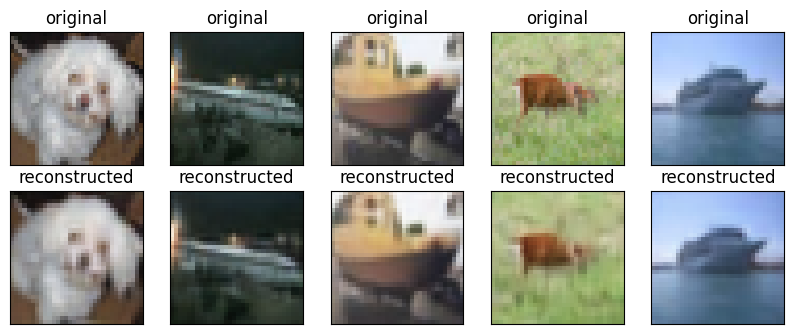

In [10]:
y_test = autoencoder.predict(x_test[1000:1005])
plot("original", x_test, "reconstructed", y_test)

#### Denoising

In [11]:
# Create noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

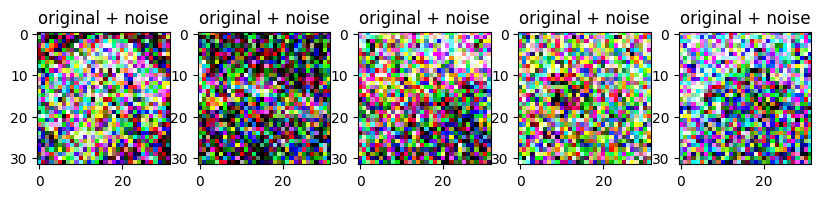

In [12]:
plt.figure(figsize=(10, 10))
for i in range(5):
    ax = plt.subplot(5, 5, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[1000+i]))
    plt.gray()
plt.show()

In [13]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5757 - accuracy: 0.6545 - mse: 0.0110 - val_loss: 0.5736 - val_accuracy: 0.6514 - val_mse: 0.0099
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5744 - accuracy: 0.6611 - mse: 0.0105 - val_loss: 0.5737 - val_accuracy: 0.6496 - val_mse: 0.0099
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5741 - accuracy: 0.6643 - mse: 0.0104 - val_loss: 0.5740 - val_accuracy: 0.6693 - val_mse: 0.0099
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5739 - accuracy: 0.6647 - mse: 0.0103 - val_loss: 0.5738 - val_accuracy: 0.6741 - val_mse: 0.0099
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5737 - accuracy: 0.6656 - mse: 0.0102 - val_loss: 0.5732 - val_accuracy: 0.6676 - val_mse: 0.0098
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.5736 - accuracy: 0.6664 - mse: 0.010

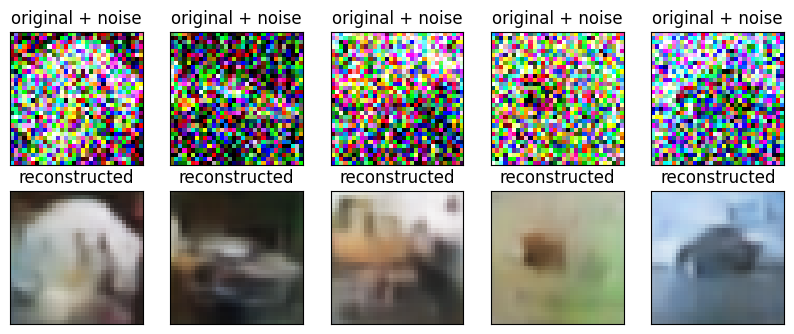

In [14]:
y_test = autoencoder.predict(x_test_noisy[1000:1005], verbose=False)
plot("original + noise", x_test_noisy, "reconstructed", y_test)

#### Super-resolution

In [15]:
x_train_lr = tf.keras.layers.AveragePooling2D()(x_train).numpy()
x_test_lr = tf.keras.layers.AveragePooling2D()(x_test).numpy()


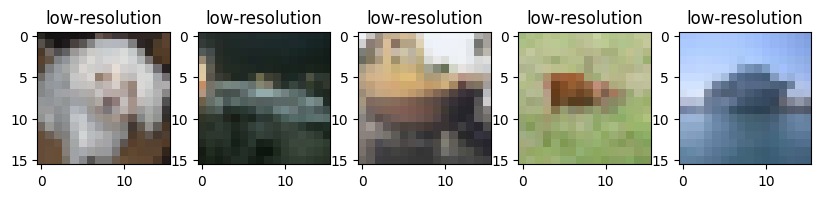

In [16]:
plt.figure(figsize=(10, 10))
for i in range(5):
    ax = plt.subplot(5, 5, i + 1)
    plt.title("low-resolution")
    plt.imshow(tf.squeeze(x_test_lr[1000+i]))
    plt.gray()
plt.show()

In [34]:
input_img = Input(shape=(16, 16, 3))

x = Conv2D(32, 3,activation='relu', padding="same")(input_img)
x = BatchNormalization()(x)
x = MaxPool2D(2)(x)
x = Conv2D(64, 3,activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = MaxPool2D(2)(x)
x = Conv2D(128, 3,activation='relu', padding="same")(x)
x = BatchNormalization()(x)
encoded = UpSampling2D((2,2))(x)
encoder = Model(inputs=input_img, outputs=encoded)

encoded_inputs = Input(shape=(8,8,128))

x = Conv2D(64, 3,activation='relu', padding="same")(encoded_inputs)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, 3,activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(3, 1)(x)
decoded = Activation("sigmoid")(x)
decoder = Model(inputs=encoded_inputs, outputs=decoded)

x = encoder(input_img)
x = decoder(x)
autoencoder = Model(inputs=input_img, outputs=x)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mse'])

In [35]:
autoencoder.fit(x_train_lr, x_train,
               epochs=25,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test_lr, x_test))

Epoch 1/25
391/391 [==============================] - 11s 13ms/step - loss: 0.5829 - accuracy: 0.6711 - mse: 0.0142 - val_loss: 0.5891 - val_accuracy: 0.6934 - val_mse: 0.0158
Epoch 2/25
391/391 [==============================] - 4s 11ms/step - loss: 0.5712 - accuracy: 0.7400 - mse: 0.0095 - val_loss: 0.5706 - val_accuracy: 0.7610 - val_mse: 0.0089
Epoch 3/25
391/391 [==============================] - 4s 10ms/step - loss: 0.5682 - accuracy: 0.7569 - mse: 0.0083 - val_loss: 0.5682 - val_accuracy: 0.7648 - val_mse: 0.0080
Epoch 4/25
391/391 [==============================] - 4s 10ms/step - loss: 0.5667 - accuracy: 0.7653 - mse: 0.0077 - val_loss: 0.5674 - val_accuracy: 0.7740 - val_mse: 0.0076
Epoch 5/25
391/391 [==============================] - 5s 12ms/step - loss: 0.5658 - accuracy: 0.7712 - mse: 0.0074 - val_loss: 0.5666 - val_accuracy: 0.7644 - val_mse: 0.0073
Epoch 6/25
391/391 [==============================] - 4s 10ms/step - loss: 0.5652 - accuracy: 0.7760 - mse: 0.0072 - val_los

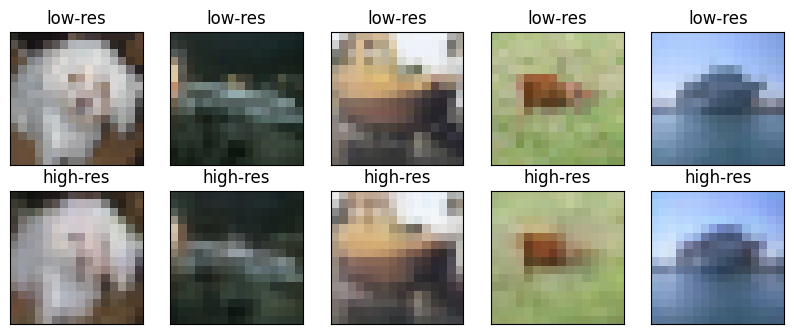

In [36]:
y_test_lr = autoencoder.predict(x_test_lr[1000:1005], verbose=False)
plot("low-res", x_test_lr, "high-res", y_test_lr)